In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def poly_plot(Green, Red, poly_deg = 3):
    Ratio = [x/y for x, y in zip(Green, Red)]  
    y = np.array(Ratio)
    Green_arr = np.array(Green)
    Red_arr = np.array(Red)
    x = np.arange(0, 15*len(Ratio),15)
    z, res, _, _, _ = np.polyfit(x, y, poly_deg, full=True)
    p = np.poly1d(z)
    crit = p.deriv().r
    r_crit = crit[crit.imag==0].real
    plot = p.deriv(2)(r_crit)
    x_max = r_crit[plot<0]
    y_max = p(x_max)
    
    return x, y, p, Green_arr, Red_arr, x_max, y_max

In [29]:
def plot(Green_Data1, Red_Data1, Green_Data2, Red_Data2, poly_deg_Data1 = 3,  poly_deg_Data2 = 3, Title="", ratioRG = False):

    x_D1, y_D1, p_D1, Green_Data1, Red_Data1, _, _, = poly_plot(Green_Data1, Red_Data1, poly_deg_Data1) 
    x_D2, y_D2, p_D2, Green_Data2, Red_Data2, _, _, = poly_plot(Green_Data2, Red_Data2, poly_deg_Data2)

    fig, (axes) = plt.subplots(1, 2, figsize=(18, 9))
    fig.suptitle("Control vs Post-DMSO",weight = "bold", fontsize=25, y = 0.96)
    
    xp_D1 = np.linspace(0, 1440, 100)
    
    if ratioRG == True:        
        labelratio = "Ration Red/Green"
        namefig = "Ratio_Red_Green"
    else:
        labelratio = "Ration Green/Red"
        namefig = "Ratio_Green_Red"
    
    for ax in axes:
        ax.set_xlabel("Time in min", fontsize=13)
        ax.set_ylabel(labelratio, fontsize=13)
    
    # Data1
    axes[0].plot(x_D1, y_D1, '.b', label = "{} Control".format(labelratio))
    axes[0].plot(xp_D1, p_D1(xp_D1), '-b', label = "polynomial fit Control")
    # Data2
    axes[0].plot(x_D2, y_D2, '.r', label = "{} Post-DMSO".format(labelratio))
    axes[0].plot(xp_D1, p_D2(xp_D1), '-r', label = "polynomial fit Post-DMSO")
    #axes[0].plot( x_max, y_max, 'o', label = "Cycle = {} hrs".format(int(x_max/60)) )
    axes[0].legend(loc=0, shadow=True)
    # Data1
    axes[1].plot(x_D1, Green_Data1, '-b', label = "Number Green Cells Control")
    axes[1].plot(x_D1, Red_Data1, '-g',label = "Number Red Cells Control")
    # Data2
    axes[1].plot(x_D2, Green_Data2, '-r', label = "Number Green Cells Post-DMSO")
    axes[1].plot(x_D2, Red_Data2, '-c', label = "Number Red Cells Post-DMSO")
    axes[1].legend(loc=0, shadow=True)
    fig.savefig('{}_Control_vs_Post-DMSO.jpg'.format(namefig))

# Tile1 vs Tile3 

In [30]:
with open('Red_Tile1.txt') as f:
    list_num_blob_Red_D1 = f.read().splitlines()
    list_num_blob_Red_D1 = [int(i) for i in list_num_blob_Red_D1]
with open('Green_Tile1.txt') as f:
    list_num_blob_Green_D1 = f.read().splitlines()
    list_num_blob_Green_D1 = [int(i) for i in list_num_blob_Green_D1]
    
with open('Red_Tile3.txt') as f:
    list_num_blob_Red_D2 = f.read().splitlines()
    list_num_blob_Red_D2 = [int(i) for i in list_num_blob_Red_D2]
with open('Green_Tile3.txt') as f:
    list_num_blob_Green_D2 = f.read().splitlines()
    list_num_blob_Green_D2 = [int(i) for i in list_num_blob_Green_D2]

## Green / Red

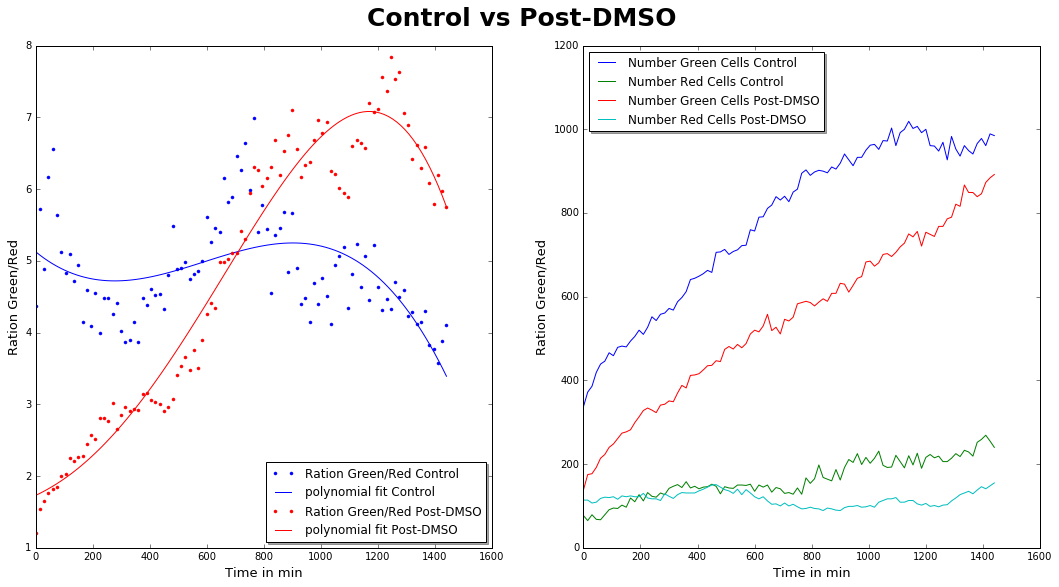

In [31]:
plot(list_num_blob_Green_D1, list_num_blob_Red_D1,list_num_blob_Green_D2, list_num_blob_Red_D2, poly_deg_Data1 = 3,poly_deg_Data2 = 4)

## Red / Green

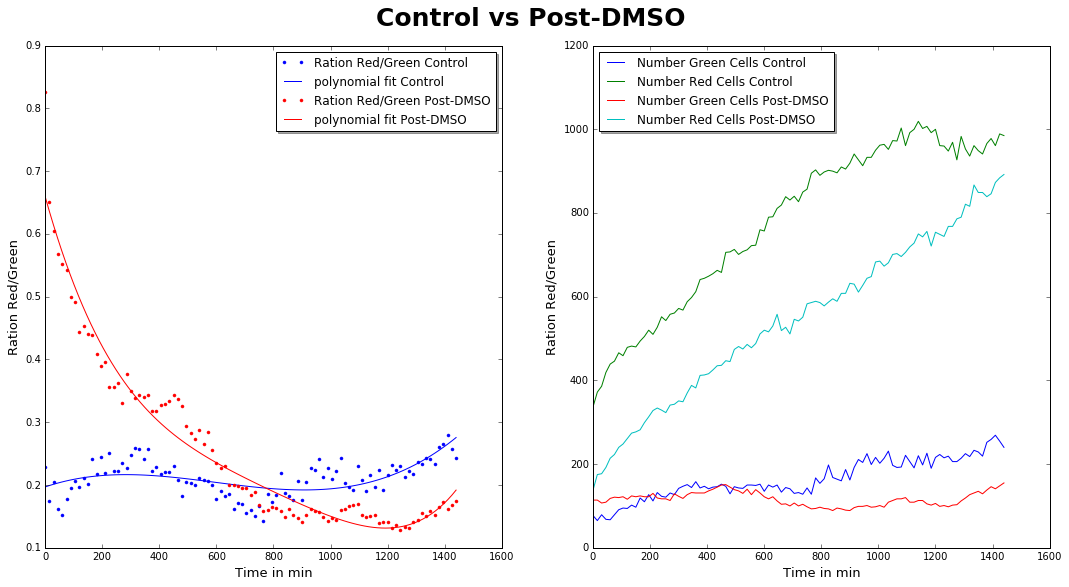

In [32]:
plot(list_num_blob_Red_D1, list_num_blob_Green_D1,list_num_blob_Red_D2, list_num_blob_Green_D2, poly_deg_Data1 = 3,poly_deg_Data2 = 4,ratioRG = True)

In [35]:
def plot(Green_Data1, Red_Data1, Green_Data2, Red_Data2, poly_deg_Data1 = 3,  poly_deg_Data2 = 3, Title="", ratioRG = False):

    x_D1, y_D1, p_D1, Green_Data1, Red_Data1, _, _, = poly_plot(Green_Data1, Red_Data1, poly_deg_Data1) 
    x_D2, y_D2, p_D2, Green_Data2, Red_Data2, _, _, = poly_plot(Green_Data2, Red_Data2, poly_deg_Data2)

    fig, (axes) = plt.subplots(1, 2, figsize=(18, 9))
    fig.suptitle("DMSO vs Control",weight = "bold", fontsize=25, y = 0.96)
    
    xp_D1 = np.linspace(0, 1440, 100)
    
    if ratioRG == True:        
        labelratio = "Ration Red/Green"
        namefig = "Ratio_Red_Green"
    else:
        labelratio = "Ration Green/Red"
        namefig = "Ratio_Green_Red"
    
    for ax in axes:
        ax.set_xlabel("Time in min", fontsize=13)
        ax.set_ylabel(labelratio, fontsize=13)
    
    # Data1
    axes[0].plot(x_D1, y_D1, '.r', label = "{} DMSO".format(labelratio))
    axes[0].plot(xp_D1, p_D1(xp_D1), '-r', label = "polynomial fit DMSO")
    # Data2
    axes[0].plot(x_D2, y_D2, '.b', label = "{} Control".format(labelratio))
    axes[0].plot(xp_D1, p_D2(xp_D1), '-b', label = "polynomial fit Control")
    #axes[0].plot( x_max, y_max, 'o', label = "Cycle = {} hrs".format(int(x_max/60)) )
    axes[0].legend(loc=0, shadow=True)
    # Data1
    axes[1].plot(x_D1, Green_Data1, '-r', label = "Number Green Cells DMSO")
    axes[1].plot(x_D1, Red_Data1, '-c', label = "Number Red Cells DMSO")
    # Data2
    axes[1].plot(x_D2, Green_Data2, '-b', label = "Number Green Cells Control")
    axes[1].plot(x_D2, Red_Data2, '-g', label = "Number Red Cells Control")
    axes[1].legend(loc=0, shadow=True)
    fig.savefig('{}_DMSO4_vs_Control6.jpg'.format(namefig))

# Tile4 vs Tile6

In [36]:
with open('Red_Tile4.txt') as f:
    list_num_blob_Red_D1 = f.read().splitlines()
    list_num_blob_Red_D1 = [int(i) for i in list_num_blob_Red_D1]
with open('Green_Tile4.txt') as f:
    list_num_blob_Green_D1 = f.read().splitlines()
    list_num_blob_Green_D1 = [int(i) for i in list_num_blob_Green_D1]
    
with open('Red_Tile6.txt') as f:
    list_num_blob_Red_D2 = f.read().splitlines()
    list_num_blob_Red_D2 = [int(i) for i in list_num_blob_Red_D2]
with open('Green_Tile6.txt') as f:
    list_num_blob_Green_D2 = f.read().splitlines()
    list_num_blob_Green_D2 = [int(i) for i in list_num_blob_Green_D2]

## Green / Red

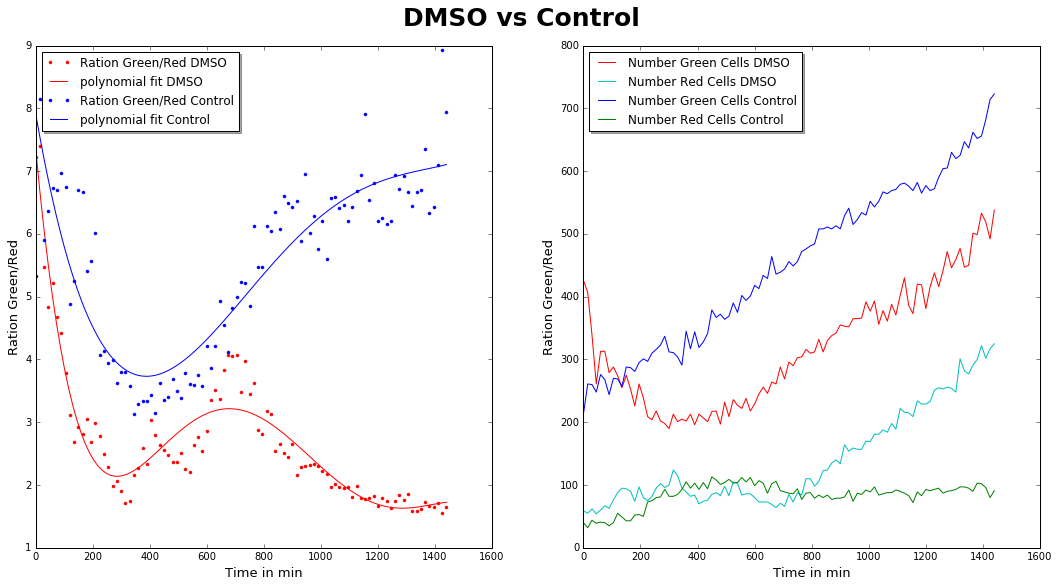

In [37]:
plot(list_num_blob_Green_D1, list_num_blob_Red_D1,list_num_blob_Green_D2, list_num_blob_Red_D2, 
     poly_deg_Data1 = 5,poly_deg_Data2 = 4)

## Red / Green

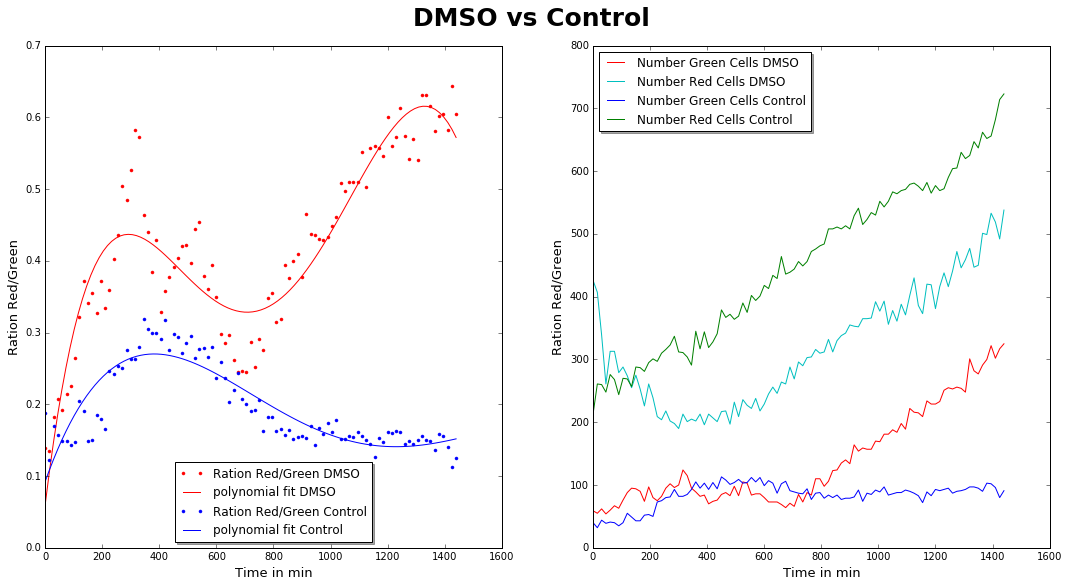

In [38]:
plot(list_num_blob_Red_D1, list_num_blob_Green_D1,list_num_blob_Red_D2, list_num_blob_Green_D2, 
     poly_deg_Data1 = 5,poly_deg_Data2 = 4,ratioRG = True)

In [39]:
def plot(Green_Data1, Red_Data1, Green_Data2, Red_Data2, poly_deg_Data1 = 3,  poly_deg_Data2 = 3, Title="", ratioRG = False):

    x_D1, y_D1, p_D1, Green_Data1, Red_Data1, _, _, = poly_plot(Green_Data1, Red_Data1, poly_deg_Data1) 
    x_D2, y_D2, p_D2, Green_Data2, Red_Data2, _, _, = poly_plot(Green_Data2, Red_Data2, poly_deg_Data2)

    fig, (axes) = plt.subplots(1, 2, figsize=(18, 9))
    fig.suptitle("DMSO vs Control",weight = "bold", fontsize=25, y = 0.96)
    
    xp_D1 = np.linspace(0, 1440, 100)
    
    if ratioRG == True:        
        labelratio = "Ration Red/Green"
        namefig = "Ratio_Red_Green"
    else:
        labelratio = "Ration Green/Red"
        namefig = "Ratio_Green_Red"
    
    for ax in axes:
        ax.set_xlabel("Time in min", fontsize=13)
        ax.set_ylabel(labelratio, fontsize=13)
    
    # Data1
    axes[0].plot(x_D1, y_D1, '.r', label = "{} DMSO".format(labelratio))
    axes[0].plot(xp_D1, p_D1(xp_D1), '-r', label = "polynomial fit DMSO")
    # Data2
    axes[0].plot(x_D2, y_D2, '.b', label = "{} Control".format(labelratio))
    axes[0].plot(xp_D1, p_D2(xp_D1), '-b', label = "polynomial fit Control")
    #axes[0].plot( x_max, y_max, 'o', label = "Cycle = {} hrs".format(int(x_max/60)) )
    axes[0].legend(loc=0, shadow=True)
    # Data1
    axes[1].plot(x_D1, Green_Data1, '-r', label = "Number Green Cells DMSO")
    axes[1].plot(x_D1, Red_Data1, '-c', label = "Number Red Cells DMSO")
    # Data2
    axes[1].plot(x_D2, Green_Data2, '-b', label = "Number Green Cells Control")
    axes[1].plot(x_D2, Red_Data2, '-g', label = "Number Red Cells Control")
    axes[1].legend(loc=0, shadow=True)
    fig.savefig('{}_DMSO5_vs_Control6.jpg'.format(namefig))

# Tile5 vs Tile6

In [40]:
with open('Red_Tile5.txt') as f:
    list_num_blob_Red_D1 = f.read().splitlines()
    list_num_blob_Red_D1 = [int(i) for i in list_num_blob_Red_D1]
with open('Green_Tile5.txt') as f:
    list_num_blob_Green_D1 = f.read().splitlines()
    list_num_blob_Green_D1 = [int(i) for i in list_num_blob_Green_D1]
    
with open('Red_Tile6.txt') as f:
    list_num_blob_Red_D2 = f.read().splitlines()
    list_num_blob_Red_D2 = [int(i) for i in list_num_blob_Red_D2]
with open('Green_Tile6.txt') as f:
    list_num_blob_Green_D2 = f.read().splitlines()
    list_num_blob_Green_D2 = [int(i) for i in list_num_blob_Green_D2]

## Green / Red

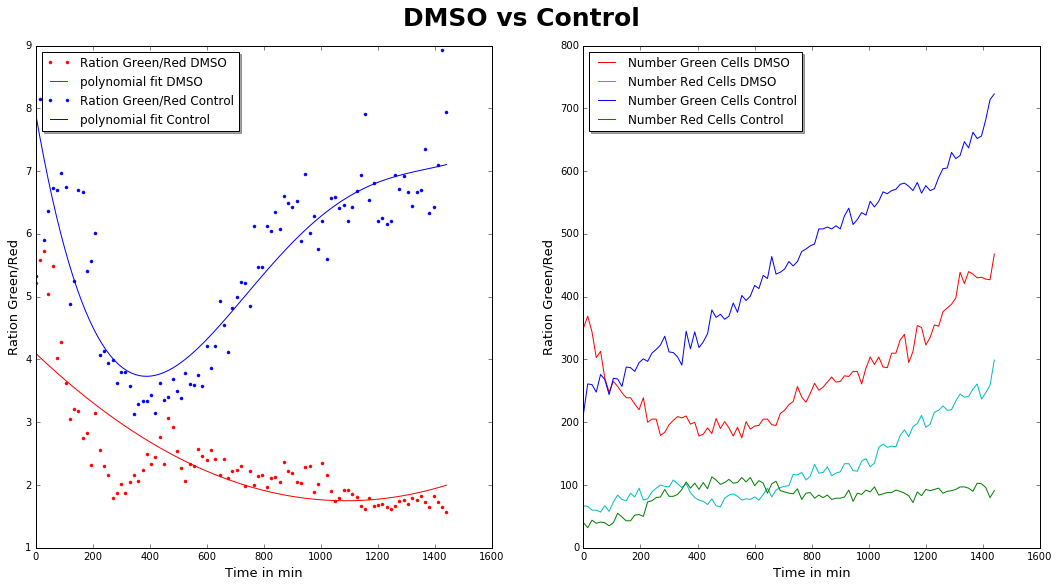

In [42]:
plot(list_num_blob_Green_D1, list_num_blob_Red_D1,list_num_blob_Green_D2, list_num_blob_Red_D2, 
     poly_deg_Data1 = 2,poly_deg_Data2 = 4)

## Red / Green

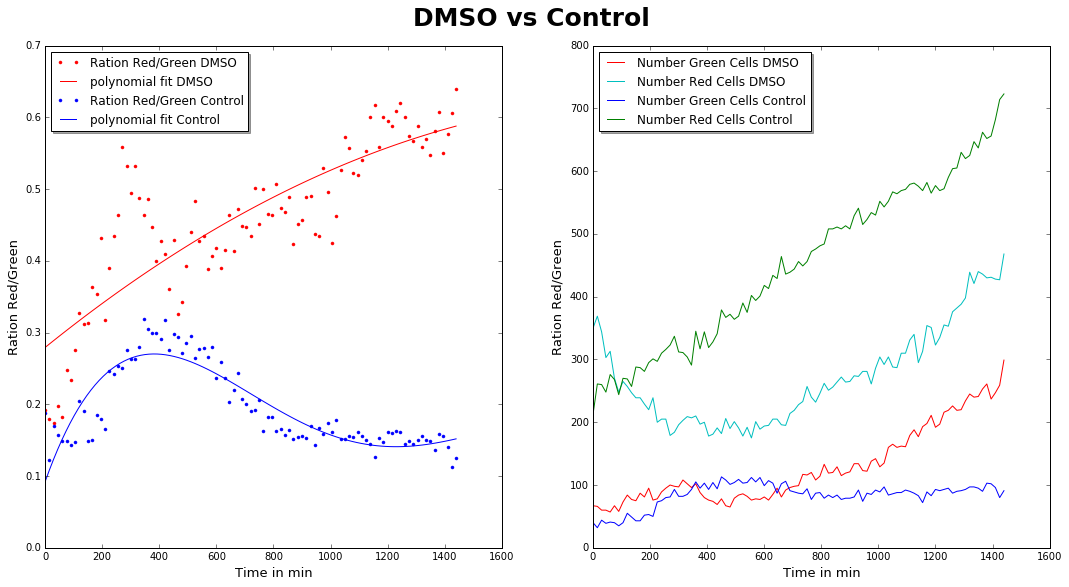

In [43]:
plot(list_num_blob_Red_D1, list_num_blob_Green_D1,list_num_blob_Red_D2, list_num_blob_Green_D2, 
     poly_deg_Data1 = 2,poly_deg_Data2 = 4,ratioRG = True)